In [90]:
#Importing Biopython for future use.

from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
from itertools import takewhile

In [91]:
#Question 1
#Functions given in file.
#Get sequences from file.

#Below: This line creates a function for getting sequences, with an input 
#file of fasta_fn.
def get_sequences_from_file(fasta_fn):
#Below: This line creates a dictionary for the sequences
    sequence_data_dict = {}
#Below: This for loop takes the fasta file and deposits various portions
#of the file into different variables. The record variable is a temporary
#variable that holds information captured during the foor loop. It is part
#of the BioPython system.
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

In [92]:
#Setting variables that will be used by following functions.

cytb_seqs = get_sequences_from_file("bears_cytb.fasta")

bears_df = pd.read_csv("bears_data.csv")
species_list = list(bears_df.species)

test_sequence = str(cytb_seqs['Ursus arctos'])
#test_sequence was used to test the written functions below.

In [120]:
#Question 2: Creating a function to translate a string variable of sequences.

def translate_function(sample_string, stop_codons=('TAA', 'TAG', 'AGA', 'AGG')):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] 
    #Above:Creating the codon reference table using BioPython.
    amino_acids = () 
    #Above: Initializing a list to be used later.
    codons = [sample_string[n:n+3] for n in range(0, len(sample_string),3)]
    #Above: Using a single for loop to loop through sample_string by groups of 3 and save the codon.
    stop_codon_loop = takewhile[lambda x: x not in stop_codons, codons]
    #Above: This line creates a loop variable using takewhile and keeps the codons so long as they don't equal the stop codons.
    #Above: Once it hits a stop codon, it exits the loop.
    amino_acids = ''.join([mito_table.forward_table[codons] for codons in stop_codon_loop])
    #Above: This line adds the codons that move passed the takewhile loop and translates them before adding to a list.
    return(amino_acids)

#Keep getting a 'type is not subscriptable' error that neither Jessica Judson, me, or Josh Walker could solve.

In [112]:
#Question 3

from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
#Above: Importing the Seq function from Bio.Seq that will help handle sequences.
#Above: Importing IUPAC from Bio.Alphabet to allow data type specification.

#Below: Create a function that takes in a string, turns into a Seq object, with data as IUPAC alphabet.
def aa_calling(sample_string):
    coding_dna = Seq(sample_string, IUPAC.ambiguous_dna)
    #Above: Takes the input, makes it a Seq object, as a IUPAC alphabet for Seq reference.
    amino_acids = coding_dna.translate(table=2, to_stop=True)
    #Above: Creates a new list that has the translated input sequence.
    return(amino_acids)


In [113]:
#Question 4

charged = ['R','K','D','E']
polar = ['Q','N','H','S','T','Y','C','M','W']
hydrophobic = ['A','I','L','F','V','P','G']

def get_proportion_aa_type_function(sample_translation, residues):
    count = 0
    for aa in sample_translation:
        if aa in residues:
            count += 1
    return count/len(sample_translation)
    

[0.0, 0.5684210526315789, 0.43157894736842106]


In [118]:
#Question 5


#Create a function that calls x, which will be the keys, and a dictionary.
def proportion_calling(x, dictionary):
    translated = aa_calling(str(dictionary[x]))
    #Above: Call the translate function, and take the values of the dictionary for x as a string and save to a variable
    proportion_charged = get_proportion_aa_type_function(translated, charged)
    #Above: Determine the proportion of charged by calling the get proportion function and enter parameters.
    proportion_polar = get_proportion_aa_type_function(translated, polar)
    #Above: Determine the proportion of polar amino acids by calling the proportion function and enter parameters.
    proportion_hydrophobic = get_proportion_aa_type_function(translated, hydrophobic)
    #Above: Determine the proportion of hydrophobic amino acids by calling the proportion fuction and enter paramaters.
    return proportion_charged, proportion_polar, proportion_hydrophobic

bears_df[['charged', 'polar', 'hydrophobic']] = bears_df.apply(lambda row: pd.Series(proportion_calling(row['species'], cytb_seqs)), axis=1)
#For the columns in the bears_df, apply the proportion calling function by indexing through by species using the cytb_seqs data.

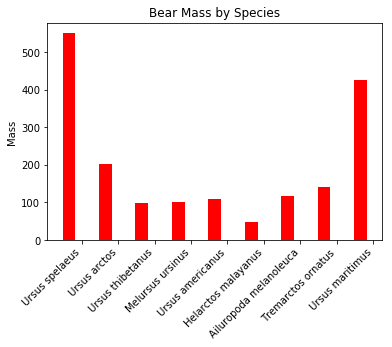

In [119]:
#Quesiton 6: Bar Plot of Mass and Species
#Code adapted from http://people.duke.edu/~ccc14/pcfb/numpympl/MatplotlibBarPlots.html

#Importing the necessary packages to implement this code.
import matplotlib.pyplot as plt
import numpy as np

#Below: creates a figure using plt's figure and assigning it to a variable.
fig = plt.figure()
#Below: takes the above variable, and adds a subplot over it.
ax = fig.add_subplot(111)
#Below: creates a variable that holds, as a list, the subspecies names
y=species_list

#Below is a variable holding the number of bins for the bars
N = 9
#Below: creates a variable that holds the mass data.
x = list(bears_df['mass'])
#Below: indicates the number of bars
ind = np.arange(N)
#Below: creates the width of the bars.
width = 0.35                    

#Below: creates the bars, by taking the number of bars needed, the data, the width of the bars, and the color
#in that order.
rects2 = ax.bar(ind, x, width, align='center', color='red')

#The variables below hold the different labels that are being applied to the graph.
#I had a problem getting the tick marks to align. For some reason, they started too far over, and I
#couldn't get them to move.
ax.set_ylabel('Mass')
ax.set_title('Bear Mass by Species')
xTickMarks = [str(i) for i in y]
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10, ha='right')

plt.show()

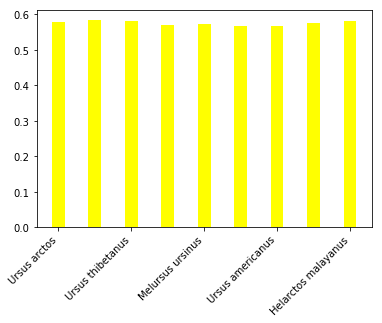

In [139]:
#Question 7

bears_plot_df=bears_df[['charged', 'polar', 'hydrophobic']]

#Below: creates a figure using plt's figure and assigning it to a variable.
fig2 = plt.figure()
#Below: takes the above variable, and adds a subplot over it.
ax2 = fig2.add_subplot(111)
#Below: creates a variable that holds, as a list, the subspecies names
y=species_list

#Below is a variable holding the number of bins for the bars
N = 9
#Below: creates a variable that holds the mass data.
x = list(bears_plot_df['charged'])
w = list(bears_plot_df['polar'])
z = list(bears_plot_df['hydrophobic'])
#Below: indicates the number of bars
ind = np.arange(N)
#Below: creates the width of the bars.
width = 0.35                    

#Below: creates the bars, by taking the number of b needed, the data, the width of the bars, and the color
#in that order.
rects1 = ax2.bar(ind, x, width, color='blue')
rects2 = ax2.bar(ind, w, width, color='red')
rects3 = ax2.bar(ind, z, width, color='yellow')

#The variables below hold the different labels that are being applied to the graph.
#I had a problem getting the tick marks to align. For some reason, they started too far over, and I
#couldn't get them to move.
ax.set_ylabel('Proportion')
ax.set_title('Amino Acid by Species')
xTickMarks = [str(i) for i in y]
ax.set_xticks(ind+width)
xtickNames = ax2.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10, ha='right')

plt.show()

#I tried.

In [140]:
#Question 8
#Saving new data frame

bears_df.to_csv('bears_mass.csv', index=False)

In [ ]:
#Notes:

#Worked with Jessica Judson and Josh Walker, and takewhile and use of lambda came from Jessica. Had previously been 
#with a ton of for loops within for loops to get things to work, by iterating through a dictionary. Was not going well.
#Git repository: https://github.com/merrittp/Python_Assignment.git

#Sources:
#http://biopython.org/wiki/SeqIO
#http://biopython.org/DIST/docs/tutorial/Tutorial.html
##http://people.duke.edu/~ccc14/pcfb/numpympl/MatplotlibBarPlots.html